


# Imágenes médicas - DICOM 3D

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom

### Abrir un archivo DICOM

In [3]:
DCM = pydicom.dcmread(r'C:\Users\Pilar\Documents\CURSO PYTHON\curso-python\docs\Assets\CT/IM-0001-0200-0001.dcm')

In [4]:
type(DCM)

pydicom.dataset.FileDataset

In [5]:
DCM

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.290.3.1225403042.932.1573045470.721.200
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'aws01'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20191106'
(0008, 0013) Instance Creation Time              TM: '164949'
(0008, 0016) SOP Class UID           

Para acceder a cada uno de los atributos del archivo DICOM se utiliza el nombre del atributo

In [6]:
DCM.PatientName

'PET CT INTECNUS'

In [7]:
DCM.StudyDescription

'PET CUERPO COMPLETO-'

In [8]:
DCM.ProtocolName

'10.1 PET/CT FDG + TORAX'

Pero también tengo la información desde el tag, usando el grupo y elemento en representación hexadecimal:

In [9]:
print("Tag  : ",DCM[0x0018,0x1030].tag)
print("VR   : ",DCM[0x0018,0x1030].VR)
print("valor: ",DCM[0x0018,0x1030].value)

Tag  :  (0018, 1030)
VR   :  LO
valor:  10.1 PET/CT FDG + TORAX


#### Ventanas de visualización típicas en CT

- Cabeza y cuello
    - cerebro w:80 c:40
    - subdural w:130-300 c:50-100
    - acv w:8 c:32 / w:40 c:40
    - hueso w:2800 c:600
    - Tejido blando: w:350–400 c:20–60
    
- Pecho
    - Pulmones w:1500 c:-600
    - Mediastino w:350 c:50
    
- Abdomen
    - Tejido blando w:400 c:50
    - Hígado w:150 c:30

- Columna
    - Tejido blando w:250 c:50
    - Hueso w:1800 c:400


## Reconstrucción multiplanar

Las tomografías son un conjunto de imágenes (cortes, slices) que se adquieren en un mismo acto de diagnóstico. Es por ello que permiten realizar reconstrucciones, esto es, obtener una imagen en cualquier plano que intersecte el volumen tomográfico relevado. 

Usualmente se estila utilizar los cortes tranversales, coronales y sagitales para analizar la imagen.



### 1 Cargar todos los cortes de la tomografía

Para poder realizar una reconstrucción, es necesario contar con todos los cortes tomográficos. Para ellos vamos a usar el módulo `glob`, que permite acceder a la información completa de un directorio en nuestra computadora.

In [17]:
import glob

directorio = 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT/*.dcm'

archivos = glob.glob(directorio, recursive=False)

print(type(archivos))
print(archivos[0:10])
print(len(archivos))


<class 'list'>
['C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0001-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0002-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0003-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0004-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0005-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0006-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0007-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0008-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0009-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0010-0001.dcm']
406


Se puede ver que `glob.glob` devuelve en `archivos` una lista de los archivos en el directorio. Sin embargo, la lista de archivos está desordenada. Para ello, tenemos que hacer un paréntesis y analizar cómo ordenar la lista.

#### *Intermezzo*: sort y mutabilidad 

Python, por supuesto, nos brinda la función `sorted` que puede ordenar una lista. Pero también nos da el método `sort` que reordena una lista. ¿Cuál es la diferencia? Veamos: 


In [11]:
a = [3,4,1,5]
b = sorted(a,reverse = True)
print(b)

[5, 4, 3, 1]


In [12]:
c = ['monoambiente', 'casa', 'departamento']
print(c)
b = c.sort()
print(b)
print(c)

['monoambiente', 'casa', 'departamento']
None
['casa', 'departamento', 'monoambiente']


In [13]:
def largo(palabra):
    """
        función de ordenamiento, recibe un sólo argumento
        y retorna un solo valor, correspondiente al criterio 
        de ordenamiento de la lista
    """
    return len(palabra)


print(largo('hola'))

c = ['monoambiente', 'casa', 'departamento','posada']
print(c)
b = sorted(c)
print("c ordenado alfabéticamente: ",b)
d = sorted(c,key=largo)
print("c ordenado por largo de palabra: ",d)
f = sorted(c,key=largo,reverse=True)
print("c ordenado por largo de palabra, inverso: ",f)



4
['monoambiente', 'casa', 'departamento', 'posada']
c ordenado alfabéticamente:  ['casa', 'departamento', 'monoambiente', 'posada']
c ordenado por largo de palabra:  ['casa', 'posada', 'monoambiente', 'departamento']
c ordenado por largo de palabra, inverso:  ['monoambiente', 'departamento', 'posada', 'casa']


> Mientras que `sorted` devuelve una lista ordenada, `sort` reordena la lista en sí misma

En este sentido, decimos que `sort` es una función que *muta* una variable en su mismo lugar (en inglés, *in place*). Por otro lado, `sorted` no cambia la variable de entrada de la función, y retorna una nueva variable.

#### *Fin intermezzo*

Volviendo a nuestro ejemplo con los archivos

In [18]:
archivos_ordenados = sorted(archivos)
print(archivos_ordenados[0:10])

['C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0001-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0002-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0003-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0004-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0005-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0006-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0007-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0008-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0009-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0010-0001.dcm']


In [19]:
dicoms = []
for fname in archivos_ordenados:
    dicoms.append(pydicom.read_file(fname))

print("Número de cortes tomográficos:",len(dicoms))

Número de cortes tomográficos: 406


Ahora nuestra lista `dicom` contiene los datos DICOM de **todos** los cortes tomográficos. Veamos si es así:

In [20]:
n_cts = len(dicoms)

for (i,dcm) in zip(range(0,n_cts),dicoms):
    print("Paciente en el corte ",i, ":", dcm.PatientName)

Paciente en el corte  0 : PET CT INTECNUS
Paciente en el corte  1 : PET CT INTECNUS
Paciente en el corte  2 : PET CT INTECNUS
Paciente en el corte  3 : PET CT INTECNUS
Paciente en el corte  4 : PET CT INTECNUS
Paciente en el corte  5 : PET CT INTECNUS
Paciente en el corte  6 : PET CT INTECNUS
Paciente en el corte  7 : PET CT INTECNUS
Paciente en el corte  8 : PET CT INTECNUS
Paciente en el corte  9 : PET CT INTECNUS
Paciente en el corte  10 : PET CT INTECNUS
Paciente en el corte  11 : PET CT INTECNUS
Paciente en el corte  12 : PET CT INTECNUS
Paciente en el corte  13 : PET CT INTECNUS
Paciente en el corte  14 : PET CT INTECNUS
Paciente en el corte  15 : PET CT INTECNUS
Paciente en el corte  16 : PET CT INTECNUS
Paciente en el corte  17 : PET CT INTECNUS
Paciente en el corte  18 : PET CT INTECNUS
Paciente en el corte  19 : PET CT INTECNUS
Paciente en el corte  20 : PET CT INTECNUS
Paciente en el corte  21 : PET CT INTECNUS
Paciente en el corte  22 : PET CT INTECNUS
Paciente en el corte 

Es claro que todos los cortes deben tener el mismo nombre de paciente. Hay otros datos dicom que cambian de acuerdo al corte tomográfico, por ejemplo:

In [21]:
for (i,dcm) in zip(range(0,n_cts),dicoms):
    print("Posición del corte ",i, ":", dcm.SliceLocation, " mm")

Posición del corte  0 : -55.250  mm
Posición del corte  1 : -57.750  mm
Posición del corte  2 : -60.250  mm
Posición del corte  3 : -62.750  mm
Posición del corte  4 : -65.250  mm
Posición del corte  5 : -67.750  mm
Posición del corte  6 : -70.250  mm
Posición del corte  7 : -72.750  mm
Posición del corte  8 : -75.250  mm
Posición del corte  9 : -77.750  mm
Posición del corte  10 : -80.250  mm
Posición del corte  11 : -82.750  mm
Posición del corte  12 : -85.250  mm
Posición del corte  13 : -87.750  mm
Posición del corte  14 : -90.250  mm
Posición del corte  15 : -92.750  mm
Posición del corte  16 : -95.250  mm
Posición del corte  17 : -97.750  mm
Posición del corte  18 : -100.250  mm
Posición del corte  19 : -102.750  mm
Posición del corte  20 : -105.250  mm
Posición del corte  21 : -107.750  mm
Posición del corte  22 : -110.250  mm
Posición del corte  23 : -112.750  mm
Posición del corte  24 : -115.250  mm
Posición del corte  25 : -117.750  mm
Posición del corte  26 : -120.250  mm
Po

#### 2 Construcción del volumen tomográfico

Convencidos de que tenemos efectivamente la información DICOM en nuestra lista, ahora debemos recuperar la imagen de cada corte, y construir un volumen con ellas. Para eso vamos a usar un arreglo 3D de `numpy`.


In [23]:
slice0 = dicoms[0]   # Primer corte, lo uso para recuperar los datos comunes a todos los cortes
vol_shape = list(slice0.pixel_array.shape) # Tamaño de la imagen 2D
print(vol_shape)
vol_shape.append(len(dicoms))   # Agregamos a la lista el tamaño de la imagen a lo largo de z
# Si tenemos poca RAM, podemos fijar la cantidad de cortes en el eje z
# vol_shape.append(100)   # Agregamos a la lista el tamaño de la imagen a lo largo de z

print(vol_shape)

matriz3D = np.zeros(vol_shape)
print(matriz3D.shape)

[512, 512]
[512, 512, 406]
(512, 512, 406)


Ya tenemos nuestro volumen tomográfico listo para ser llenado con las imágenes:

In [24]:
# Si tenemos poca RAM, podemos leer sólo los cortes que queremos,acorde
# a la cantidad de cortes que definimos antes
# for i, slice in enumerate(dicoms[100:200]):

for i, slice in enumerate(dicoms):

    corte = slice.pixel_array * slice.RescaleSlope + slice.RescaleIntercept
    matriz3D[:, :, i] = corte

#### 3 Extracción de imágenes

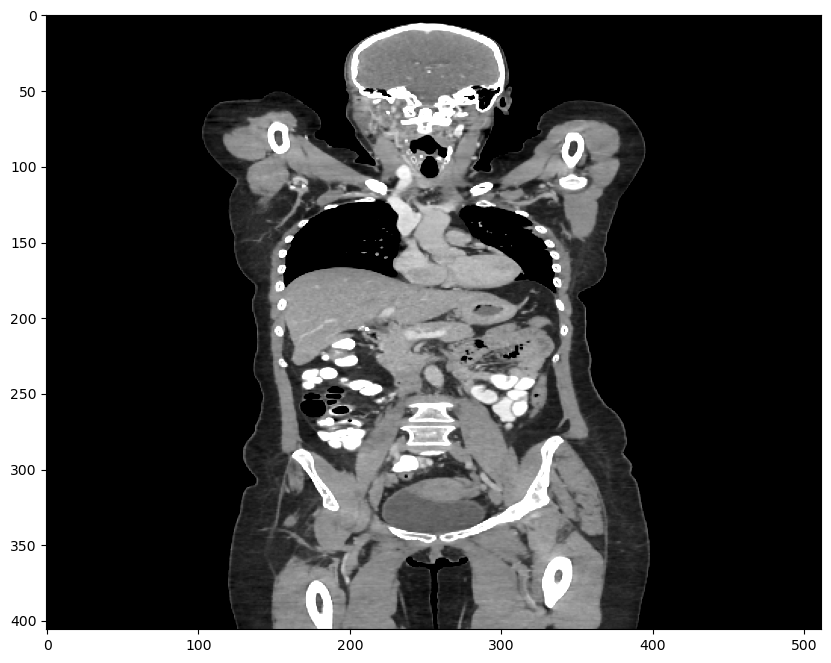

In [29]:
#
#   Window and level
#
c = 40
w = 400
ventmax = c + w/2
ventmin = c - w/2


fig_1 = plt.figure(1, figsize=(10,10))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[255, :, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
plt.show()


#### 4 Relación de aspecto

Como puede verse,la imagen aparece 'aplastada' en la dirección longitudinal. Esto se debe a que **los vóxeles no son isotrópicos** en CT, es decir, no tienen las mismas dimensiones:

In [30]:
espaciadoX,espaciadoY = slice0.PixelSpacing
espesor = slice0.SliceThickness
print('El espesor de corte es de: {:.2f} mm'.format(espesor))
print('La dimension en el plano X,Y es de {:.2f} mm x {:.2f} mm '.format(espaciadoX,espaciadoY))

El espesor de corte es de: 2.50 mm
La dimension en el plano X,Y es de 1.37 mm x 1.37 mm 


Con estos datos podemos definir la relación de aspecto entre el eje Z y el eje X (o Y):

$$
\texttt{AspectRatio} = \frac{\texttt{PixelSpacing}}{\texttt{SliceThickness}}
$$

Relación de aspecto: 1.8285707598369791


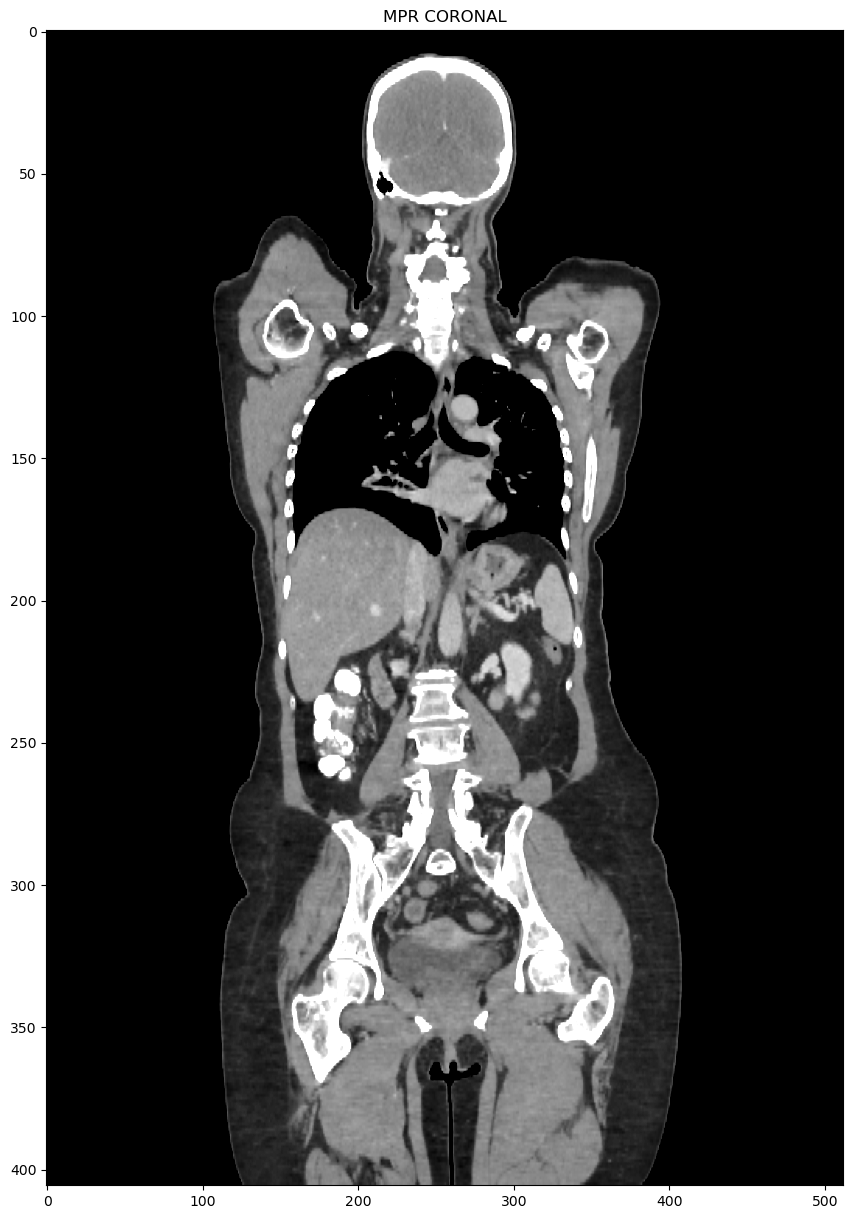

In [35]:
aspecto = espesor/espaciadoX
print("Relación de aspecto:",aspecto)
fig_1 = plt.figure(1, figsize=(15,15))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[280, :, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
a1.set_aspect(aspecto)
a1.set_title('MPR CORONAL')
plt.show()


### Una cosa más...

> **No siempre el orden de los nombres de los archivos DICOM de una CT corresponde con el orden a lo largo del eje Z !!!**

En efecto, bien podría ser que al ordenar los archivos por su nombre, como hicimos más arriba, los cortes tomográficos queden desordenados. 

Por suerte, como vimos antes, `sorted` viene al rescate.

In [ ]:
help(sorted)

La función `sorted` puede recibir en forma opcional una función que se utilice para ordenar la lista, en el parámetro `key`.

En nuestro caso, la función que necesitamos es aquella que nos devuelve el valor de `SliceLocation`, que efectivamente indica la posición del corte a lo largo del eje Z.

In [37]:
def z_mm(archivo):
    dcm = pydicom.read_file(archivo)
    return dcm.SliceLocation

z_mm('C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT/IM-0001-0145-0001.dcm')

'-415.25'

In [38]:
print(archivos[0:10])

['C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0001-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0002-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0003-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0004-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0005-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0006-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0007-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0008-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0009-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0010-0001.dcm']


In [39]:
archivos_reordenados = sorted(archivos,key = z_mm, reverse = True)
print(archivos_reordenados[0:10])

['C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0001-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0002-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0003-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0004-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0005-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0006-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0007-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0008-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0009-0001.dcm', 'C:/Users/Pilar/Documents/CURSO PYTHON/curso-python/docs/Assets/CT\\IM-0001-0010-0001.dcm']


In [40]:
dicoms = []
for fname in archivos_reordenados:
    dicoms.append(pydicom.read_file(fname))

print("Número de cortes tomográficos:",len(dicoms))

Número de cortes tomográficos: 406


In [41]:
for i, slice in enumerate(dicoms):
    corte = slice.pixel_array * slice.RescaleSlope + slice.RescaleIntercept
    matriz3D[:, :, i] = corte

Relación de aspecto: 1.8285707598369791


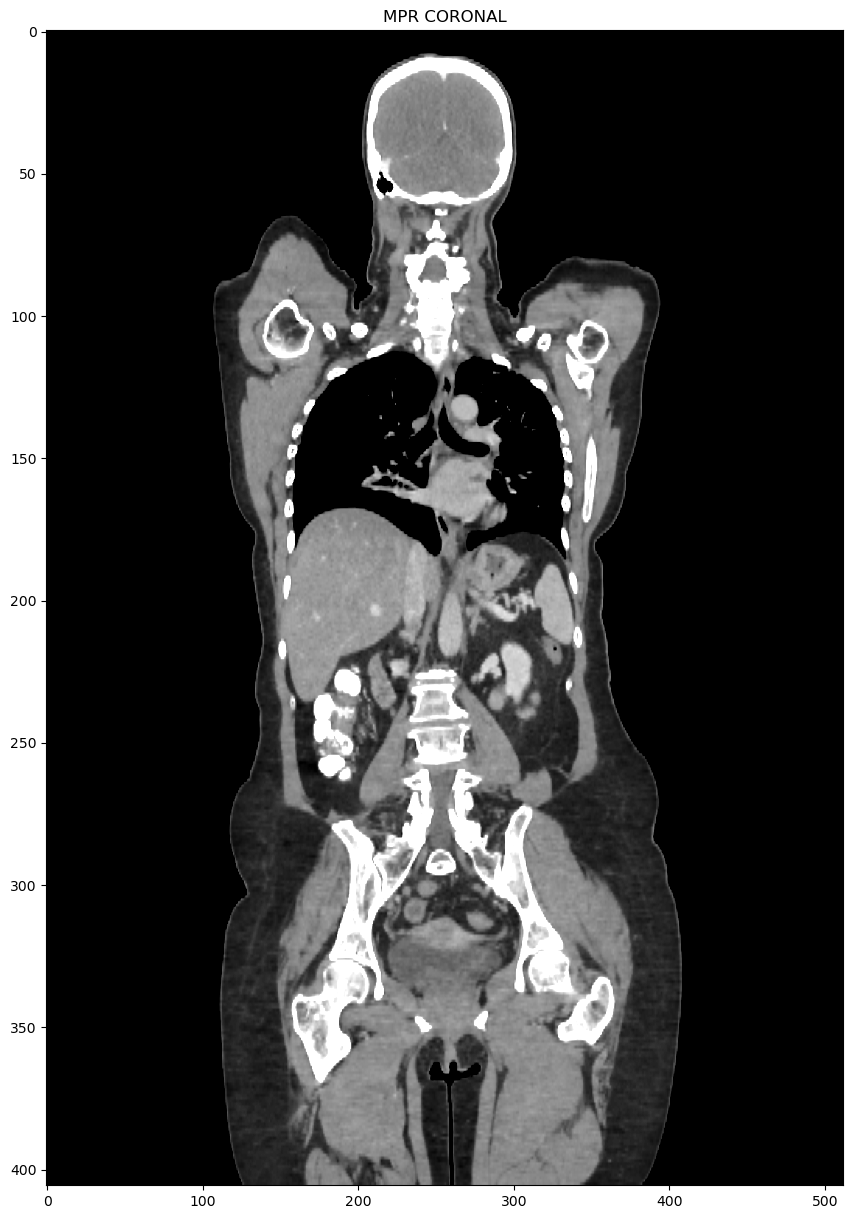

In [42]:
aspecto = espesor/espaciadoX
print("Relación de aspecto:",aspecto)
fig_1 = plt.figure(1, figsize=(15,15))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[280, :, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
a1.set_aspect(aspecto)
a1.set_title('MPR CORONAL')
plt.show()